In [2]:
import os
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
!pip install python-vivid

     |████████████████████████████████| 76 kB 762 kB/s 
     |████████████████████████████████| 301 kB 10.6 MB/s 
     |████████████████████████████████| 166.7 MB 17 kB/s 
     |████████████████████████████████| 21.9 MB 94.1 MB/s 
     |████████████████████████████████| 164 kB 85.4 MB/s 
     |████████████████████████████████| 80 kB 1.6 MB/s 
     |████████████████████████████████| 75 kB 829 kB/s 
     |████████████████████████████████| 49 kB 974 kB/s 
     |████████████████████████████████| 111 kB 70.8 MB/s 
     |████████████████████████████████| 141 kB 42.1 MB/s 
  Created wheel for feather-format: filename=feather_format-0.4.1-py3-none-any.whl size=2453 sha256=b96560b82953628b77eee993697b578eb59954958095ef9297fa8d744351bcf8
  Stored in directory: /home/sato.mizuki/.cache/pip/wheels/7b/83/4b/44aa8f2292c0ae17a550c5105454e974fc45a5b2a522d66ae1
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11107 sha256=ce62f27a2fe152eac2d83c24a2f021457141596e8c6374ea9aee

In [3]:
INPUT_data = 'data/'
INPUT_photo = os.path.join(INPUT_data, 'photos/')

OUTPUT = 'out_put/'
os.makedirs(OUTPUT, exist_ok=True)

photo_pathes = glob(os.path.join(INPUT_photo, '*.jpg'))

In [4]:
train_df = pd.read_csv(os.path.join(INPUT_data, 'train.csv'))
test_df = pd.read_csv(os.path.join(INPUT_data, 'test.csv'))

material_df = pd.read_csv(os.path.join(INPUT_data, 'materials.csv'))
technique_df = pd.read_csv(os.path.join(INPUT_data, 'techniques.csv'))

In [5]:
from matplotlib_venn import venn2

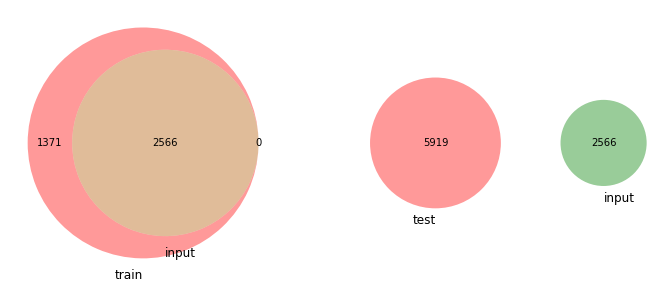

In [6]:
input_df = technique_df

fig, axes = plt.subplots(figsize=(12,5), ncols=2)

venn2(subsets=(
    set(train_df['object_id']), set(input_df['object_id'])),set_labels=('train', 'input'), ax=axes[0])

venn2(subsets = (set(test_df['object_id']), set(input_df['object_id'])), set_labels=('test', 'input'), ax=axes[1])

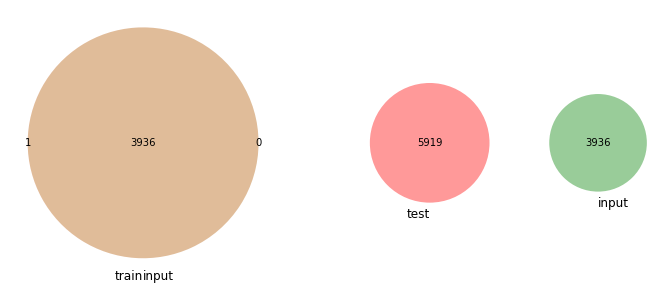

In [7]:
input_df = material_df

fig, axes = plt.subplots(figsize=(12,5), ncols=2)

venn2(subsets=(set(train_df['object_id']), set(input_df['object_id'])), set_labels=('train', 'input'), ax=axes[0])
venn2(subsets=(set(test_df['object_id']), set(input_df['object_id'])), set_labels=('test', 'input'), ax=axes[1])

In [9]:
train_df.head()

,object_id,sorting_date,art_series_id,target
0,002bff09b09998d0be65,1631,509357f67692a6a45626,1
1,00309fb1ef05416f9c1f,1900,7987b47bbe5dc3039179,3
2,003a1562e97f79ba96dc,1834,ded7c3c9636708e5b14c,3
3,004890880e8e7431147b,1743,582ac2d7f0cef195b605,2
4,00718c32602425f504c1,1885,64c907f0c08dce4fb8e8,3


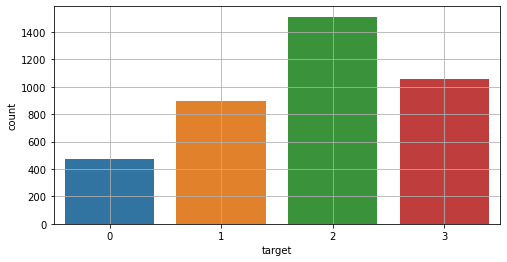

In [10]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(data=train_df, x='target', ax=ax)
ax.grid()

In [11]:
train_df['target'].value_counts().sort_index()

0     475
1     896
2    1511
3    1055
Name: target, dtype: int64

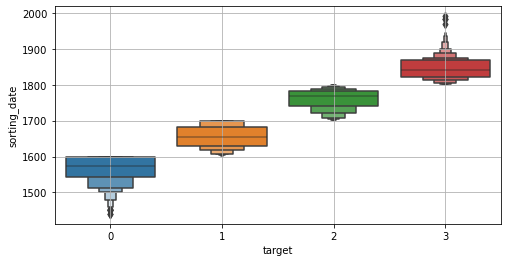

In [12]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.boxenplot(data=train_df, x='target', y='sorting_date', ax=ax)
ax.grid()

In [13]:
train_df.groupby('target')['sorting_date'].agg(['min', 'max', 'median', 'size'])

,min,max,median,size
target,,,,
0,1440,1600,1574,475
1,1601,1700,1655,896
2,1701,1800,1770,1511
3,1801,1991,1841,1055
